# Perceptron Algorithm
Source Code: [perceptron.py](https://github.com/)

## Implementation


A brief walk-through of your implementation of the perceptron update (Equation 1) in your source code. Quote the function which you use to perform the update. It’s not necessary to walk the user through every single aspect of your solution class.

## Experiments

### Linearly Separable 2D Data 
Here is a data set with 2 features. 

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from perceptron import Perceptron

np.random.seed(12345)

def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  plt.plot(x, y, color = "black")

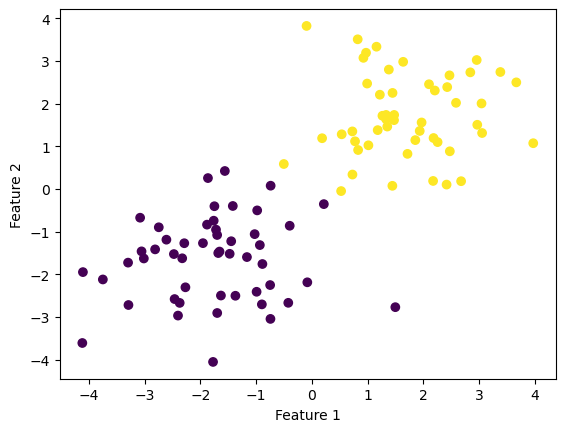

In [101]:
n = 100
p_features = 2

X, y = make_blobs(n_samples = n, n_features = p_features, centers = [(-1.75, -1.75), (1.75, 1.75)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

As shown in the graph, it looks like the points could be separated by a line in a way such that all the purple points are on one side of the line and all the yellow points are on the other side of the line. In other words, the purple points would have the label "0" where as the yellow points would have the label "1". 

When we run our Perceptron fit method on this data, we can inspect it's history of scores. We see that over time the score flucuated as adjustments to w were being made, but it eventually reaches 100% classification. This means that the fit method eventually found the variable of weights that would allow it to create a line that correctly separates these two groups of data. 

[0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.93, 0.93, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 1.0]


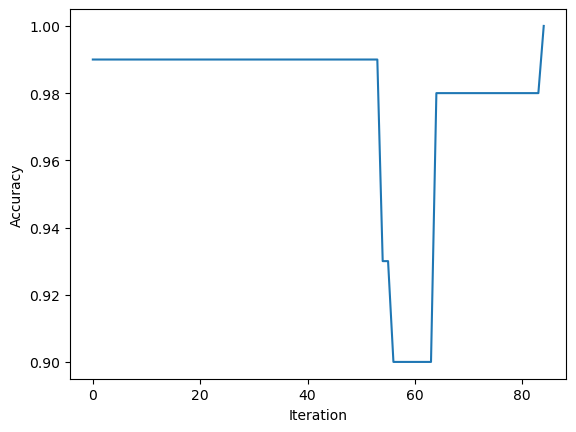

In [102]:
p = Perceptron()
p.fit(X, y)
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

When we then graph our line using the weights our Perceptron fit method found, we see that our algorithm was indeed able to separate the data accurately. 

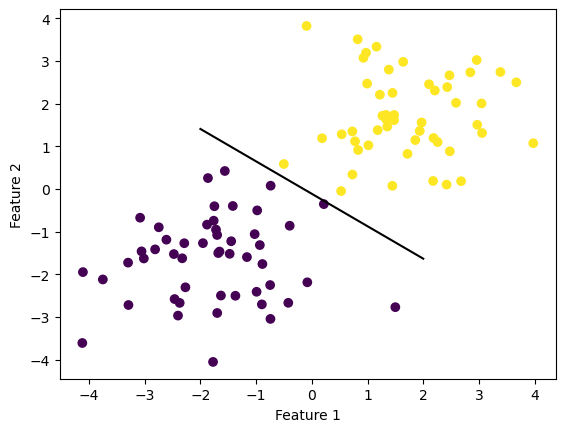

In [103]:
fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

### Not Linearly Separable 2D Data

Here is another dataset with 2 features. 

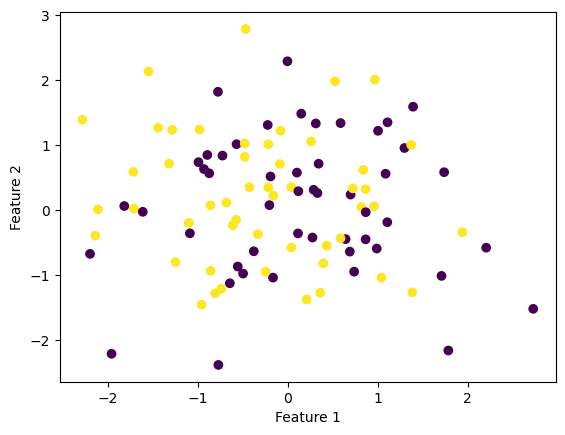

In [104]:
n = 100
p_features = 2

X, y = make_blobs(n_samples = n, n_features = p_features, centers = [(0, 0), (0, 0)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

This time, however, it does not look like we can separate the purple and yellow points from each other. This time it does not look like we can separate the points into their respective labels with a line. 

When looking at this set's history of scores, we see that it too flucates. This time, however, we see that its never reaches 1, in other words, does not reach 100% classification, and eventually reaches the max number of times we'll adjust w. While the Perceptron fit method still stores the last value of weights in the object, it communicates that it is not accurate as it gives the warning that the data was unable to converge. 

/Users/katiemacalintal/Desktop/Machine Learning/KatieMacalintal.github.io/posts/perceptron/perceptron.py:51: UserWarning: WARNING: Could not converge
  warnings.warn("WARNING: Could not converge")


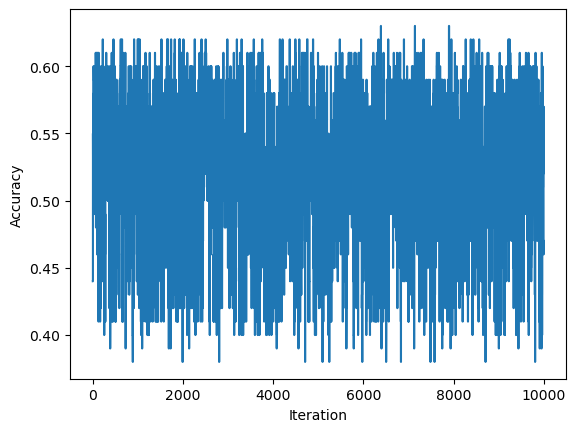

In [105]:
p = Perceptron()
p.fit(X, y)
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

When we then graph our line using the weights of our final iteration our Perceptron fit method found, we see that, as expected, our algorithm was not able to separate the data into their expected labels. (Note: The scale of the axis may also look different) 

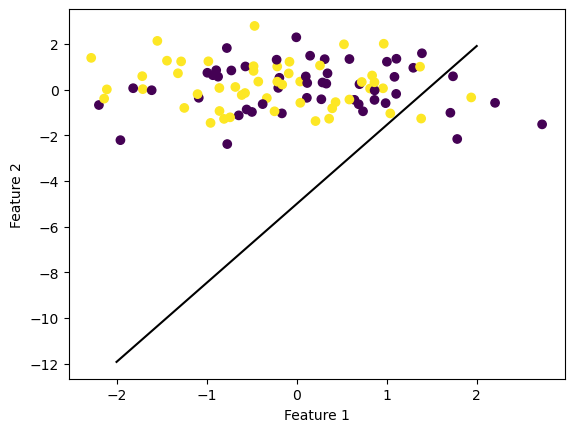

In [106]:
fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

### More Than 2-Dimensions 
Our perceptron algorithm can also work in more than 2 dimensions. This time we've created a dataset of two distinct groups with 7 features.

In [107]:
n = 100
p_features = 7
X, y = make_blobs(n_samples = n, n_features = p_features, centers = [(-1, -1, -1, -1, -1, -1, -1), (1, 1, 1, 1, 1, 1, 1)])

Since this is difficult to visualize, we will only be inspecting its history of scores. As we can see in the chart, our new data set is linearly separable as the score eventually reaches 1. 

[0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.9

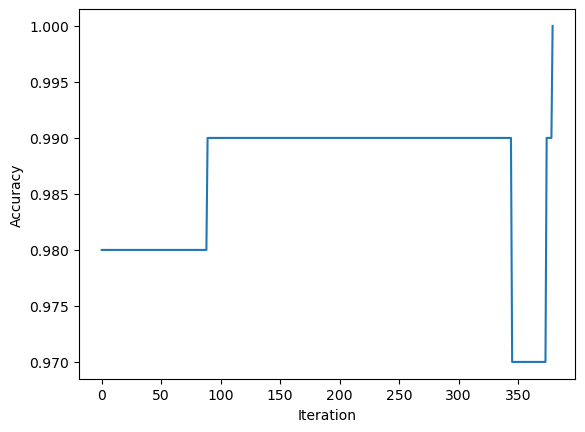

In [108]:
p = Perceptron()
p.fit(X, y)
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

We can also alter this dataset, so that the two groups overlap. 

In [109]:
n = 100
p_features = 7
X, y = make_blobs(n_samples = n, n_features = p_features, centers = [(10, 10, 10, 10, 10, 10, 10), (10, 10, 10, 10, 10, 10, 10)])

As we can see by inspecting the history of scores and the warning that is thrown, our dataset never converges. 

/Users/katiemacalintal/Desktop/Machine Learning/KatieMacalintal.github.io/posts/perceptron/perceptron.py:51: UserWarning: WARNING: Could not converge
  warnings.warn("WARNING: Could not converge")


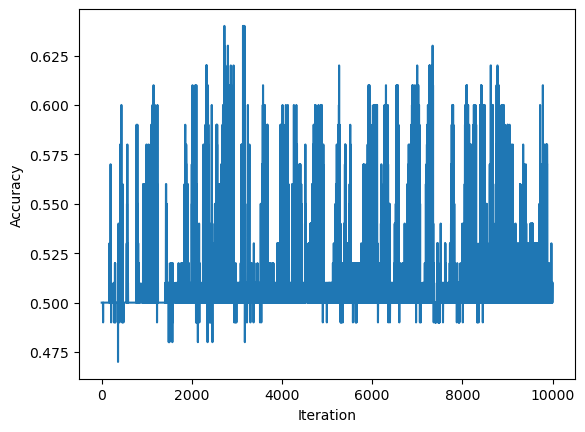

In [110]:
p = Perceptron()
p.fit(X, y)
fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Accuracy")

## Runtime Analysis 